In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#reading the data set

In [4]:
df=pd.read_csv("Unemployment in India.csv")

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.fillna(0, inplace=True)
df.fillna(df.mean(), inplace=True)

<ipython-input-7-7665a0e064ec>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df = df.rename(columns={df.columns[0]:'Region',df.columns[3]:'Unemployment_rate',df.columns[4]:'Employed', df.columns[5]:'labour_participation_rate', df.columns[6]:'area'})
df.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 0, 'Chandigarh'],
      dtype=object)

In [12]:
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,0,0,0,0.00,0.0,0.00,0
764,0,0,0,0.00,0.0,0.00,0
765,0,0,0,0.00,0.0,0.00,0
766,0,0,0,0.00,0.0,0.00,0


In [13]:
df2 = df2.rename(columns={df2.columns[0]:'Region',df2.columns[3]:'Unemployment_rate',df2.columns[4]:'Employed', df2.columns[5]:'labour_participation_rate', df2.columns[6]:'area'})
df2.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


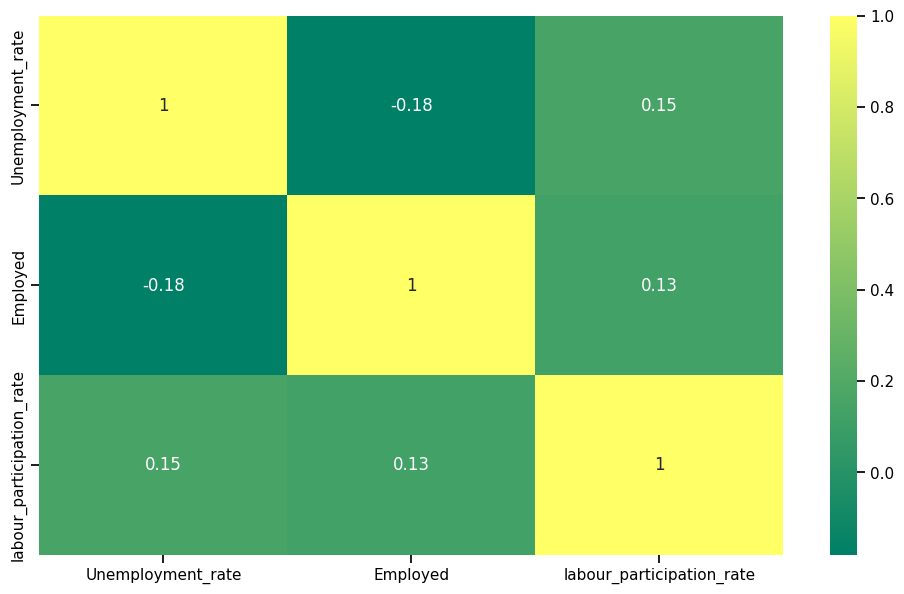

In [15]:
heat_maps = df[['Unemployment_rate','Employed','labour_participation_rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

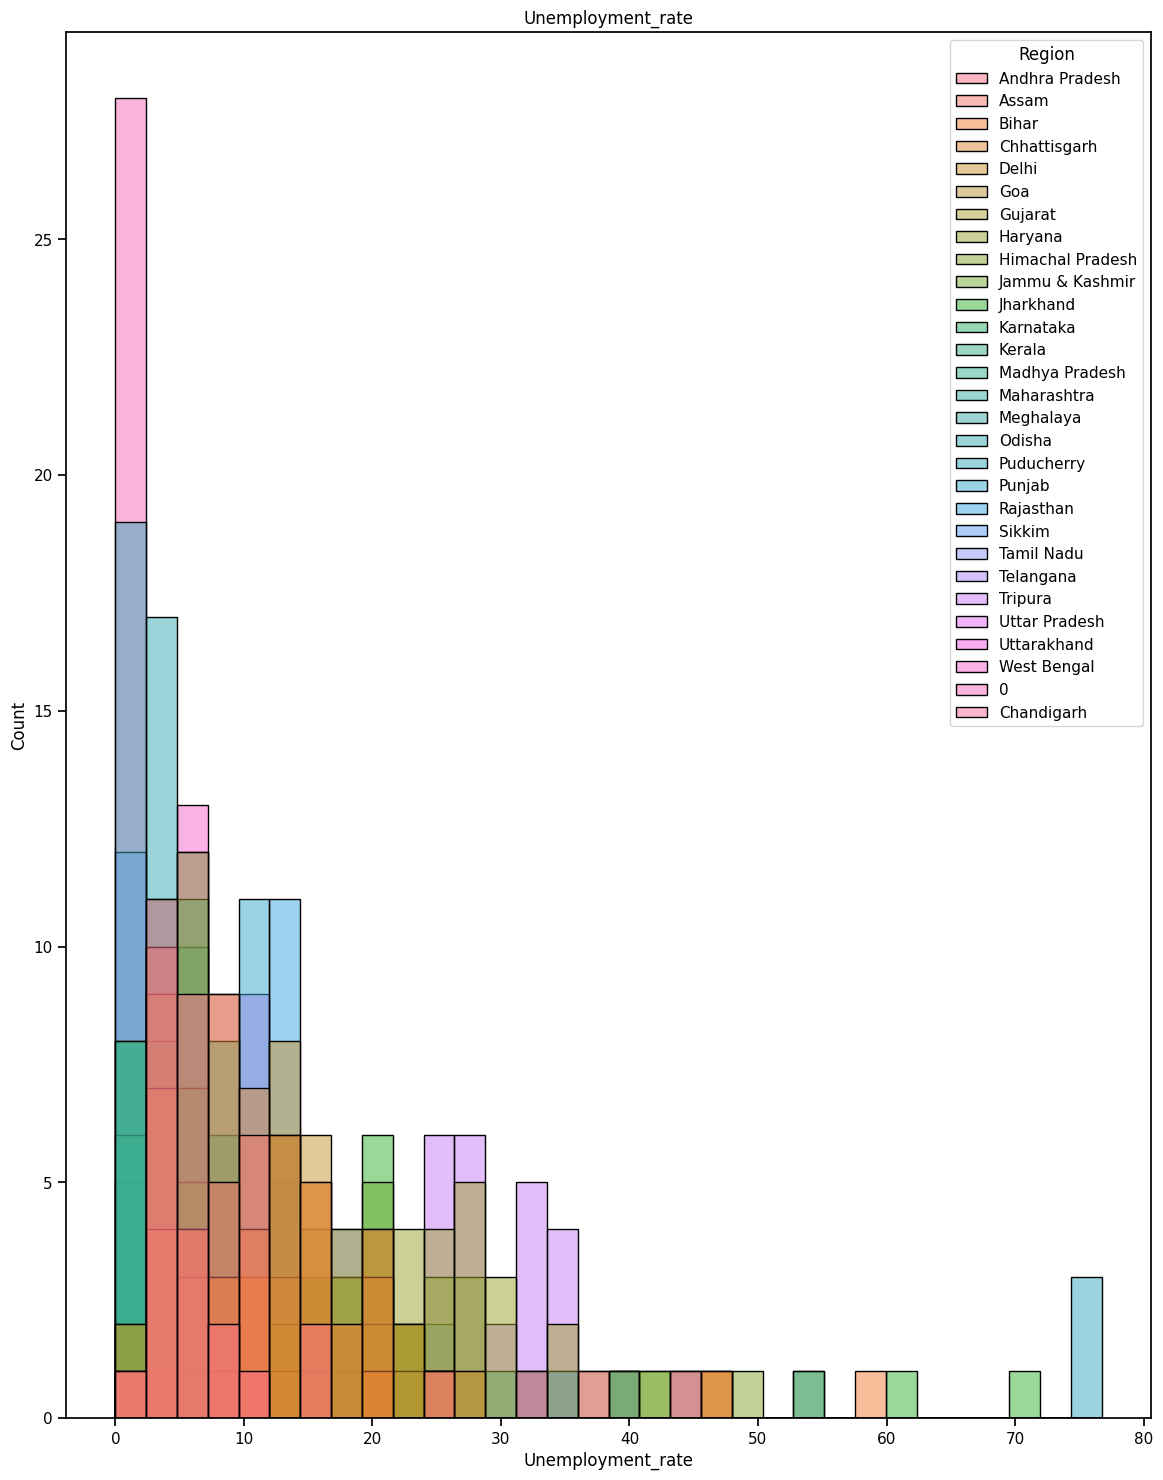

In [16]:
df2.columns= ["Region","Date","Frequency","Unemployment_rate","Employed","labour_participation_rate","area","longitude","latitude"]
plt.figure(figsize=(14, 18))
plt.title("Unemployment_rate")
sns.histplot(x="Unemployment_rate", hue="Region", data=df)
plt.show()

In [17]:
region = df2.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Employed", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [20]:
region = df2.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Unemployment_rate", color="Region", title="Average Unemployed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [22]:
unemployment = df2[["Region", "area", "Unemployment_rate"]]

fig = px.sunburst(unemployment, path=['area','Region'], values='Unemployment_rate',
                  title= 'Unemployment rate in every State and Region', height=700)
fig.show()

 PROJECT DONE BY PATTAN.ZAHEER AHMED